# Redução de dimensionalidade com PCA e LDA usando Sklearn

A redução de dimensionalidade se refere à redução do número de recursos em um conjunto de dados de forma que o desempenho geral dos algoritmos treinados no conjunto de dados seja minimamente afetado. Com a redução da dimensionalidade, o tempo de treinamento de algoritmos estatísticos pode ser reduzido significativamente e os dados podem ser visualizados mais facilmente, uma vez que não é fácil visualizar conjuntos de dados em dimensões superiores.

# PCA
A análise de componentes principais é uma técnica de redução de dimensionalidade não supervisionada que não depende dos rótulos de um conjunto de dados. A análise de componentes principais prioriza os recursos com base em sua capacidade de causar variação máxima na saída. A ideia por trás do PCA é capturar os recursos que contêm o máximo de recursos sobre o conjunto de dados. O recurso que causa a variação máxima na saída é chamado de primeiro componente principal, o recurso que causa a segunda maior variação é chamado de segundo componente principal e assim por diante.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris_df = sns.load_dataset("iris")

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# dividindo dataset
X = iris_df.drop(['species'], axis=1)
y = iris_df['species']

In [5]:
# convertendo rotulos em numeros
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.decomposition import PCA

# criando objeto de classe PCA
pca = PCA()

# treinando modelo PCA
X_train = pca.fit_transform(X_train)

# realizando precições com X_test
X_test = pca.transform(X_test)

In [9]:
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


A saida acima mostra que 72,22% da variancia é causada no primeiro principal compononete,e 23,97% no segundo principal componente, se somarmos os dois principais componentes teremos 96,19% de variancia

In [10]:
# utilizando a classificação logística
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
# realizando predições através da regressão logística
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

# predizendo o resultado dos testes
y_pred = lg.predict(X_test)

# avaliando resultados
from sklearn.metrics import accuracy_score
ac_result = accuracy_score(y_test, y_pred)*100
print(f'teste de acuracia para o modelo: %.2f%%' % ac_result)

teste de acuracia para o modelo: 86.67%


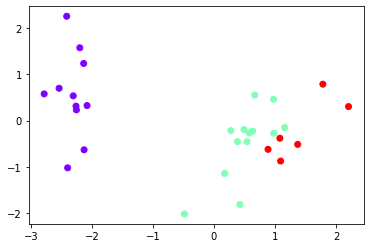

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='rainbow')

# LDA
# Análise Discriminante Linear
A Análise Discriminante Linear (LDA) é uma técnica de redução de dimensionalidade supervisionada, onde um limite de decisão é formado em torno de pontos de dados pertencentes a cada cluster de uma classe. Os pontos de dados são projetados para novas dimensões de forma que a distância entre os pontos de dados dentro de um cluster seja minimizada, enquanto a distância entre os clusters é maximizada. As novas dimensões são classificadas de acordo com sua capacidade de (i) minimizar a distância entre os pontos de dados dentro de um cluster e (ii) maximizar a distância entre os clusters individuais.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [16]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [17]:
variance_ratios = lda.explained_variance_ratio_
print(variance_ratios)

[0.98793602 0.01206398]


In [18]:
# criando um objeto LDA
lda = LDA(n_components=1)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
ac_result = accuracy_score(y_test, y_pred)
print('Resultado de teste de acuracia: %.2f' % ac_result)

Resultado de teste de acuracia: 0.90
